In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
tool_dir = "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/ESMF_profiling"
sys.path.append(tool_dir)
from esmfFileParser import collect_runtime_tot
import matplotlib.pyplot as plt
import pandas as pd
import statistics

In [2]:
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_avg",
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_atm',
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_accum',
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ice',
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ice',
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ocn',
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_aofluxes_run',
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_restart_write',

('[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_restart_write',)

In [4]:
ESMF_path = [
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_1/archive/output000", 
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_3/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_2/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_5/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/epbl_1_om5/archive/output002",
            ]
runtime_tot = collect_runtime_tot(
    ESMF_path,
    regionNames=[
        "[ESMF]",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-OCN] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN-TO-MED] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-ICE] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE-TO-MED] RunPhase1",
        # "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_avg",
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_atm',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_accum',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ice',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ice',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ocn',
        "[ESMF]/[ensemble] Init 1",
        "[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p5/[MED] IPDv03p7/MED: (med_map_mod: RouteHandles_init)",
        "[ESMF]/[ensemble] FinalizePhase1",
        
    ],
    profile_prefix="ESMF_Profile.",
    esmf_summary=True,
    index=4,
)

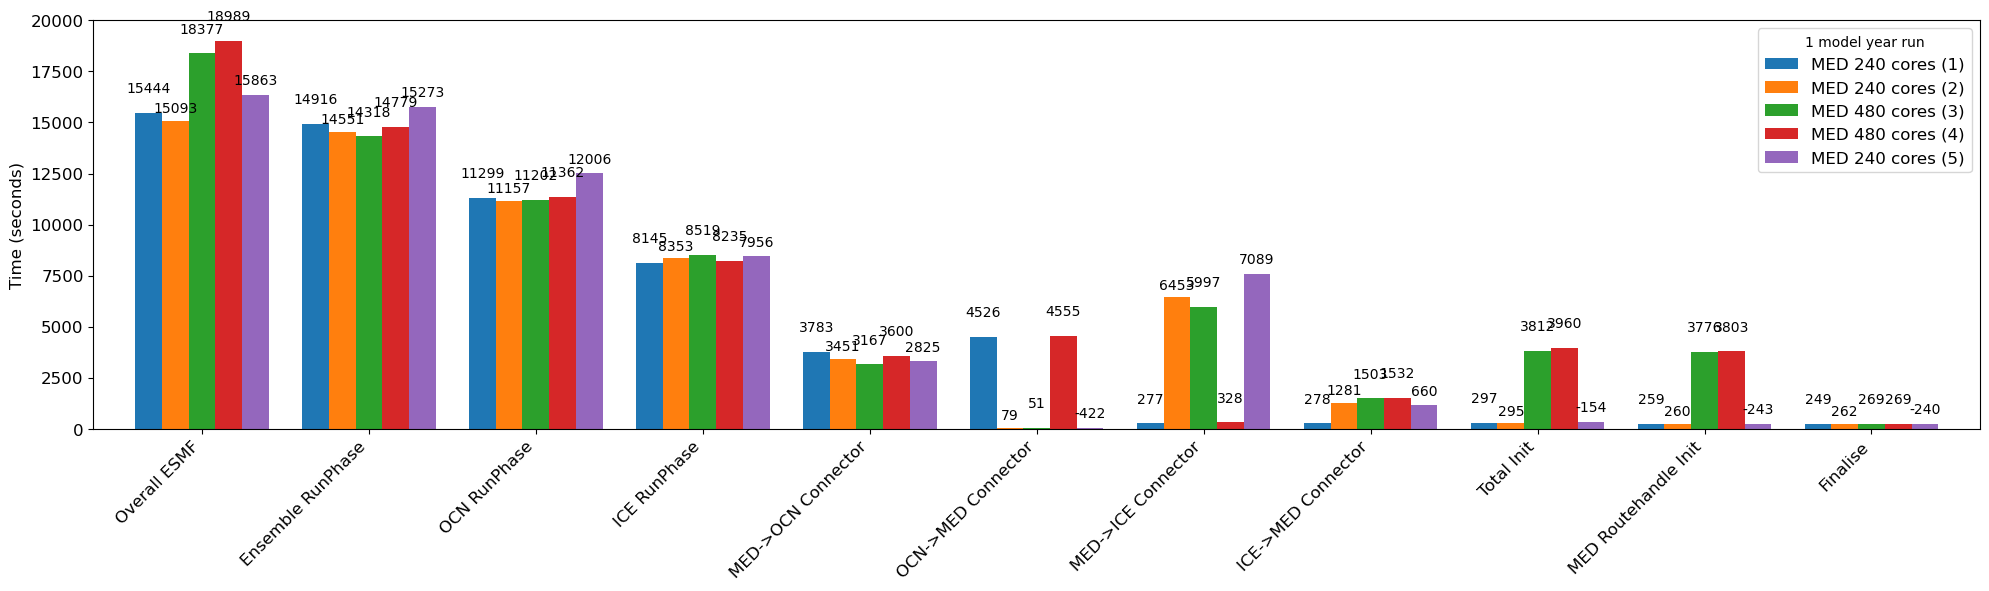

In [6]:
df1 = pd.DataFrame(runtime_tot[0]).T
df2 = pd.DataFrame(runtime_tot[1]).T
df3 = pd.DataFrame(runtime_tot[2]).T
# df4 = pd.DataFrame(runtime_tot[3]).T
df5 = pd.DataFrame(runtime_tot[3]).T
df6 = pd.DataFrame(runtime_tot[4]).T

df1.columns = ["MED 240 cores (1)"]
df2.columns = ["MED 240 cores (2)"]
df3.columns = ["MED 480 cores (3)"]
# df4.columns = ["MED 240 cores (4)"]
df5.columns = ["MED 480 cores (4)"]
df6.columns = ["MED 240 cores (5)"]
df = pd.concat([
    df1, df2, df3, df5, df6,
], axis=1)
ax = df.plot(kind='bar', figsize=(20, 6), width=0.8)
custom_labels = [
    "Overall ESMF",
    "Ensemble RunPhase",
    "OCN RunPhase",
    "ICE RunPhase",
    "MED->OCN Connector",
    "OCN->MED Connector",
    "MED->ICE Connector",
    "ICE->MED Connector",
    "Total Init",
    "MED Routehandle Init",
    "Finalise"
]
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        if i == 0:
            height_c = 500
            height=height+height_c
        elif i==1:
            height_c = -100
            height=height+height_c
        elif i==2:
            height_c = 500
            height=height+height_c
        elif i==3:
            height_c = 500
            height=height+height_c
            
        ax.annotate(f'{height-height_c:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')
plt.ylabel('Time (seconds)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
ax.set_xticklabels(custom_labels, rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.legend(title='1 model year run', fontsize=12)
plt.ylim([0,20000])
plt.tight_layout()
#plt.savefig('/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/ESMF_profiling/MED_Runtime_Comparison.png', dpi=300)
plt.show()

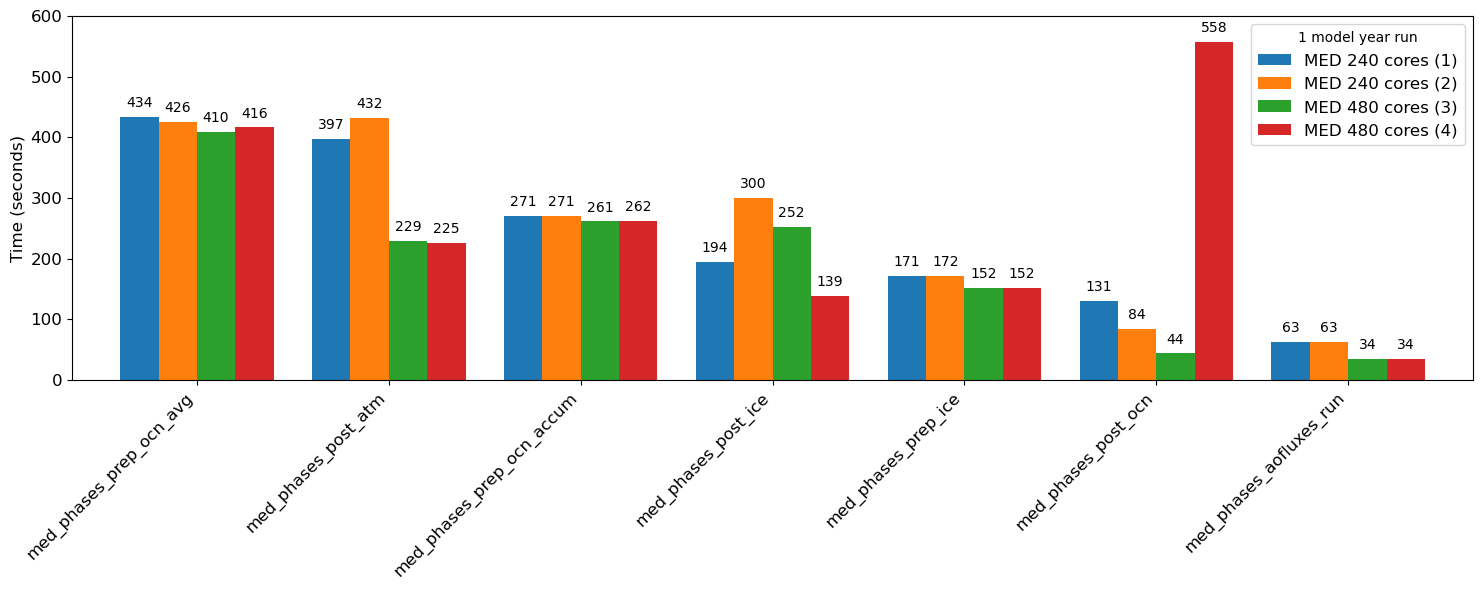

In [8]:
ESMF_path = [
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_1/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_3/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_2/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_5/archive/output000"
            ]
regionNames=[
        # "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_avg",
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_atm',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_accum',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ice',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ice',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ocn',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_aofluxes_run',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_restart_write',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED]',
    ]
runtime_tot = collect_runtime_tot(
    ESMF_path,
    regionNames=regionNames,
    profile_prefix="ESMF_Profile.",
    esmf_summary=True,
    index=2,
)

keys_plots = list(runtime_tot[0].keys())

index=7
df1 = pd.DataFrame(runtime_tot[0]).T.head(index)
df2 = pd.DataFrame(runtime_tot[1]).T.head(index)
df3 = pd.DataFrame(runtime_tot[2]).T.head(index)
df5 = pd.DataFrame(runtime_tot[3]).T.head(index)
df1.columns = ["MED 240 cores (1)"]
df2.columns = ["MED 240 cores (2)"]
df3.columns = ["MED 480 cores (3)"]
df5.columns = ["MED 480 cores (4)"]
df = pd.concat([df1, df2, df3, df5], axis=1)
ax = df.plot(kind='bar', figsize=(15, 6), width=0.8)
custom_labels = [regionName.split(' ')[-1] for regionName in keys_plots[:index]]
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        # if i == 0:
        #     height_c = 500
        #     height=height+height_c
        # elif i==1:
        #     height_c = -100
        #     height=height+height_c
        # elif i==2:
        #     height_c = 500
        #     height=height+height_c
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')
plt.ylabel('Time (seconds)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
ax.set_xticklabels(custom_labels, rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.legend(title='1 model year run', fontsize=12)
plt.ylim([0,600])
plt.tight_layout()
#plt.savefig('/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/ESMF_profiling/MED_Runtime_Comparison2.png', dpi=300)
plt.show()

In [31]:
for i, runtime in enumerate(runtime_tot):
    sum_values = sum(sum(values) for values in runtime.values())
    print(sum_values)
    

11127.9445
12877.852400000002


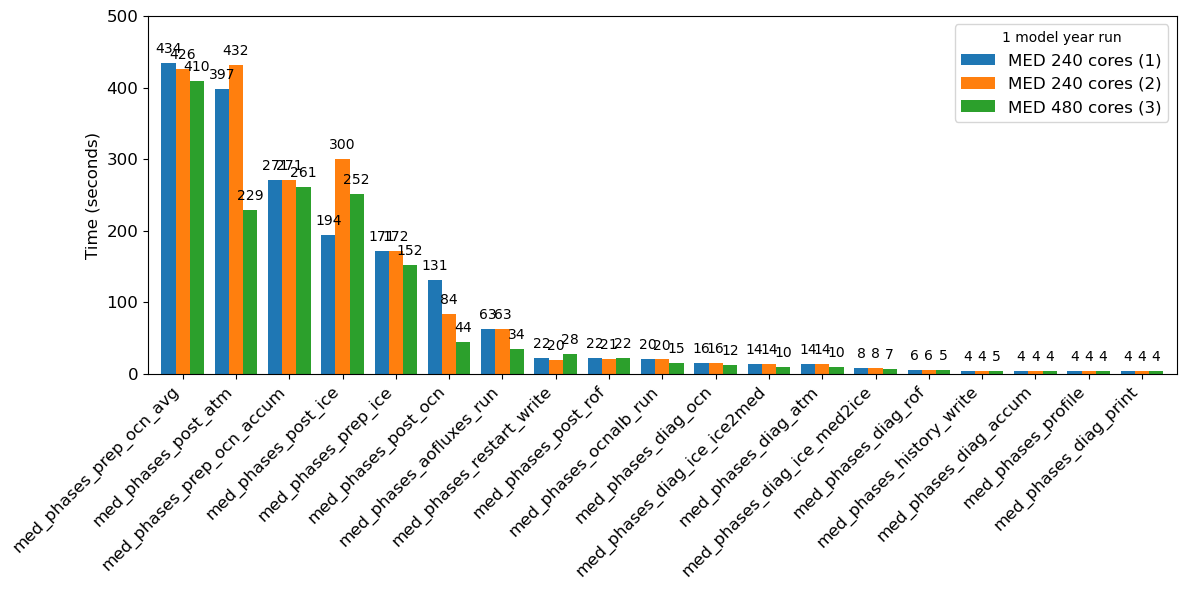

In [72]:
df1 = pd.DataFrame(runtime_tot[0]).T#.head(7)
df2 = pd.DataFrame(runtime_tot[1]).T#.head(7)
df3 = pd.DataFrame(runtime_tot[2]).T#.head(7)
df1.columns = ["MED 240 cores (1)"]
df2.columns = ["MED 240 cores (2)"]
df3.columns = ["MED 480 cores (3)"]
df = pd.concat([df1, df2, df3], axis=1)
ax = df.plot(kind='bar', figsize=(12, 6), width=0.8)
custom_labels = [
    regionName.split(' ')[-1] for regionName in keys_plots#[:7]
                ]
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        # if i == 0:
        #     height_c = 500
        #     height=height+height_c
        # elif i==1:
        #     height_c = -100
        #     height=height+height_c
        # elif i==2:
        #     height_c = 500
        #     height=height+height_c
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')
plt.ylabel('Time (seconds)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
ax.set_xticklabels(custom_labels, rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.legend(title='1 model year run', fontsize=12)
plt.ylim([0,500])
plt.tight_layout()
plt.show()

In [87]:
ESMF_path = [
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_1/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_3/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_2/archive/output000"
            ]
regionNames=[
        "[ESMF]",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1",
        #"[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-OCN] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN-TO-MED] RunPhase1",
       # "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-ICE] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_avg",
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_atm',
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_accum',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ice',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ice',
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ocn',
        #"[ESMF]/[ensemble] Init 1",
        #"[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p5/[MED] IPDv03p7/MED: (med_map_mod: RouteHandles_init)",
        #"[ESMF]/[ensemble] FinalizePhase1",
    ]

runtime_tot = collect_runtime_tot(
    ESMF_path,
    regionNames=regionNames,
    profile_prefix="ESMF_Profile.",
    esmf_summary=True,
    index=2,
)

In [88]:
df1 = pd.DataFrame(runtime_tot[0]).T#.head(7)
df2 = pd.DataFrame(runtime_tot[1]).T#.head(7)
df3 = pd.DataFrame(runtime_tot[2]).T#.head(7)
df1.columns = ["MED 240 cores (1)"]
df2.columns = ["MED 240 cores (2)"]
df3.columns = ["MED 480 cores (3)"]
df = pd.concat([df1, df2, df3], axis=1)

ocn_sum = df.iloc[2:].sum(axis=0)
new_row = pd.DataFrame(ocn_sum).T
new_row.index = ['ocn_sum_time']
df = pd.concat([df, new_row])
df

,MED 240 cores (1),MED 240 cores (2),MED 480 cores (3)
[ESMF],15408.9953,15052.5348,18335.7693
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1,14900.8375,14510.3019,14274.2701
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1,11145.2305,11047.1644,11131.0807
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-OCN] RunPhase1,3148.4692,2856.3068,2035.0394
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN-TO-MED] RunPhase1,666.6183,18.6688,18.5026
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_avg,434.3081,426.1597,409.6181
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_accum,270.8171,271.2328,261.4603
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ocn,130.8496,84.3609,43.9778
ocn_sum_time,15796.2928,14703.8934,13899.6789


In [102]:
ESMF_path = [
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_1/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_3/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_2/archive/output000"
            ]
regionNames=[
        "[ESMF]",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-ICE] RunPhase1",
    "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE-TO-MED] RunPhase1",
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_atm',
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ice',
        '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ice',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_diag_ice_ice2med',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM-TO-MED] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_restart_write',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_rof',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_diag_atm',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF] RunPhase1',
    ]

runtime_tot = collect_runtime_tot(
    ESMF_path,
    regionNames=regionNames,
    profile_prefix="ESMF_Profile.",
    esmf_summary=True,
    index=2,
)

In [103]:
df1 = pd.DataFrame(runtime_tot[0]).T#.head(7)
df2 = pd.DataFrame(runtime_tot[1]).T#.head(7)
df3 = pd.DataFrame(runtime_tot[2]).T#.head(7)
df1.columns = ["MED 240 cores (1)"]
df2.columns = ["MED 240 cores (2)"]
df3.columns = ["MED 480 cores (3)"]
df = pd.concat([df1, df2, df3], axis=1)

ice_sum = df.iloc[2:].sum(axis=0)
new_row = pd.DataFrame(ice_sum).T
new_row.index = ['ice_sum_time']
df = pd.concat([df, new_row])
df

,MED 240 cores (1),MED 240 cores (2),MED 480 cores (3)
[ESMF],15408.9953,15052.5348,18335.7693
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1,14900.8375,14510.3019,14274.2701
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1,8045.0615,8086.6336,8302.5243
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-ICE] RunPhase1,182.3638,2977.2028,1841.1595
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE-TO-MED] RunPhase1,188.2914,606.5547,917.6563
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_atm,397.4275,431.8689,229.3514
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ice,194.0271,300.1310,251.8908
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ice,171.4365,171.5456,152.3458
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_diag_ice_ice2med,14.0573,13.7794,10.0348
[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM-TO-MED] RunPhase1,26.6442,68.1859,85.7206


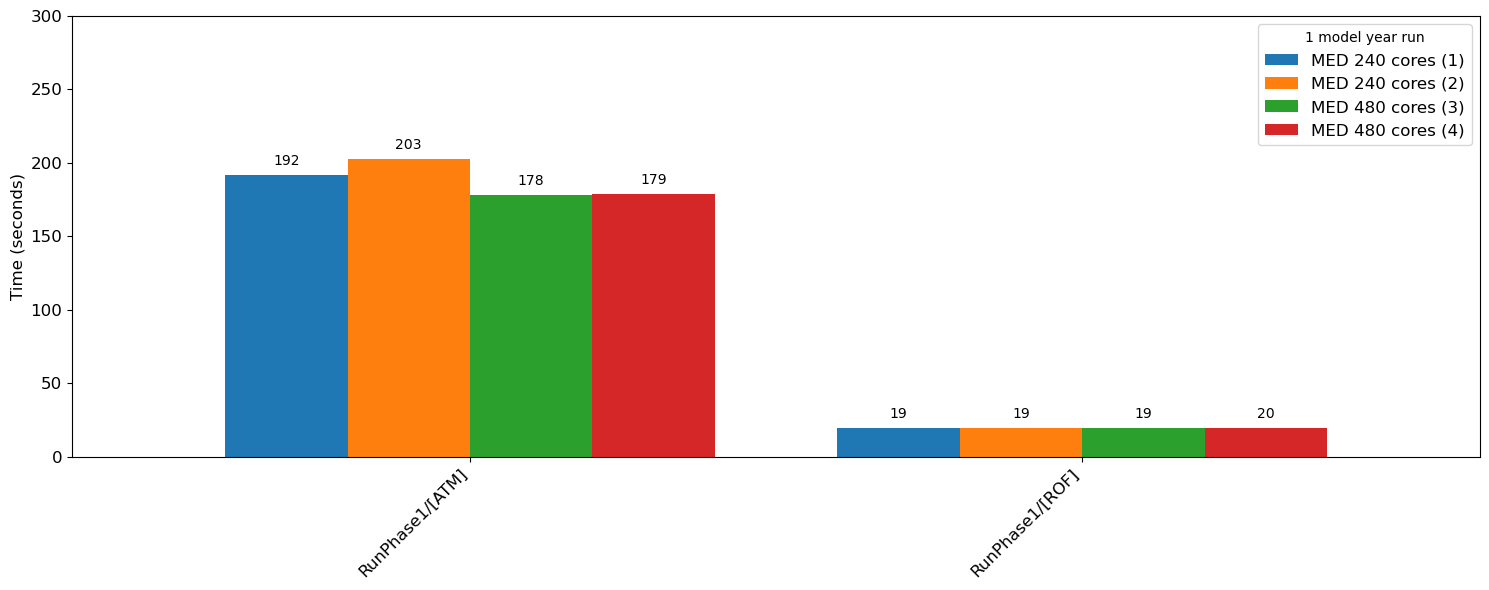

In [31]:
ESMF_path = [
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_1/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_3/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_2/archive/output000",
    "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_5/archive/output000"
            ]
regionNames=[
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF] RunPhase1',
    ]
runtime_tot = collect_runtime_tot(
    ESMF_path,
    regionNames=regionNames,
    profile_prefix="ESMF_Profile.",
    esmf_summary=True,
    index=2,
)

keys_plots = list(runtime_tot[0].keys())

index=7
df1 = pd.DataFrame(runtime_tot[0]).T.head(index)
df2 = pd.DataFrame(runtime_tot[1]).T.head(index)
df3 = pd.DataFrame(runtime_tot[2]).T.head(index)
df5 = pd.DataFrame(runtime_tot[3]).T.head(index)
df1.columns = ["MED 240 cores (1)"]
df2.columns = ["MED 240 cores (2)"]
df3.columns = ["MED 480 cores (3)"]
df5.columns = ["MED 480 cores (4)"]
df = pd.concat([df1, df2, df3, df5], axis=1)
ax = df.plot(kind='bar', figsize=(15, 6), width=0.8)
custom_labels = [regionName.split(' ')[-2] for regionName in keys_plots[:index]]
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        # if i == 0:
        #     height_c = 500
        #     height=height+height_c
        # elif i==1:
        #     height_c = -100
        #     height=height+height_c
        # elif i==2:
        #     height_c = 500
        #     height=height+height_c
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')
plt.ylabel('Time (seconds)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
ax.set_xticklabels(custom_labels, rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.legend(title='1 model year run', fontsize=12)
plt.ylim([0,300])
plt.tight_layout()
plt.savefig('/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/ESMF_profiling/MED_Runtime_Comparison3.png', dpi=300)
plt.show()

In [20]:
%%time

ESMF_path = [
    #"/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_1/archive/output000", 
    # "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_3/archive/output000",
    # "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_2/archive/output000",
    # "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/med_core_240_5/archive/output000",
     "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_new_topo_modify/epbl_1_om5/archive/output002",
            ]

regionNames = [
        "[ESMF]",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-OCN] RunPhase1",
       "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN-TO-MED] RunPhase1",
        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-ICE] RunPhase1",
       "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE-TO-MED] RunPhase1",
        # "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_avg",
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_atm',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_accum',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ice',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ice',
        # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ocn',
        "[ESMF]/[ensemble] Init 1",
        "[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p5/[MED] IPDv03p7/MED: (med_map_mod: RouteHandles_init)",
        "[ESMF]/[ensemble] FinalizePhase1",
    ]
runtime_tot_max = collect_runtime_tot(
    ESMF_path,
    regionNames=regionNames,
    profile_prefix="ESMF_Profile.",
    esmf_summary=False,
    index=5,
)

runtime_tot_min = collect_runtime_tot(
    ESMF_path,
    regionNames=regionNames,
    profile_prefix="ESMF_Profile.",
    esmf_summary=False,
    index=4,
)

No matches found for target prefix: [ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1
No matches found for target prefix: [ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1
No matches found for target prefix: [ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1
No matches found for target prefix: [ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1
No matches found for target prefix: [ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1
No matches found for target prefix: [ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1
No matches found for target prefix: [ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1
No matches found for target prefix: [ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1
No matches found for target prefix: [ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1
No matches found for target prefix: [ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1


In [ ]:
# regionNames = [
#         "[ESMF]",
#         "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1",
#         "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1",
#         "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1",
#         "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-OCN] RunPhase1",
#        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN-TO-MED] RunPhase1",
#         "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-ICE] RunPhase1",
#        "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE-TO-MED] RunPhase1",
#         # "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_avg",
#         # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_atm',
#         # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ocn_accum',
#         # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ice',
#         # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_prep_ice',
#         # '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED] med_phases_post_ocn',
#         "[ESMF]/[ensemble] Init 1",
#         "[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p5/[MED] IPDv03p7/MED: (med_map_mod: RouteHandles_init)",
#         "[ESMF]/[ensemble] FinalizePhase1",
#     ]

In [22]:
values = runtime_tot_max[0]["[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-OCN] RunPhase1"]
print(len(values))
median_MED_TaO_OCN = statistics.median(values)
max_MED_TO_OCN = max(values)
min_MED_TO_OCN = min(values)
mean_MED_TO_OCN = mean(values)
#min_MED_TO_OCN

1344


8.3259